# Classification

***Definition:***
- In Classification methods, we are trying to find a relationship between a bunch of qualitative or quantitative variables to some qualitative variables.
- Qualitative variables take in an unordered set $C$, such as 

    $\text{eye color}\in \{\text{brown,blue,green}\}$

    $\text{email}\in \{\text{spam,ham}\}$
- Given a feature vector $X$ and a qualitative response $Y$ taking values in set $C$, the classification take is to build a function $C(X)$ that takes input feature vector $X$ and predicts its value for $Y$;i.e, $C(X)\in C$.
- Often we are more intrested in estimating the probabilities that $X$ belong to each category in $C$.

In [1]:
 import numpy as np
 import pandas as pd
 
 import matplotlib.pyplot as plt
 from matplotlib import style
 import seaborn as sns
 import matplotlib as mpl

 import warnings
 warnings.filterwarnings('ignore')

 from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
 from sklearn.metrics import confusion_matrix, classification_report, precision_score
 from sklearn import preprocessing
 from sklearn import neighbors

 style.use('fivethirtyeight')
 %matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
credit = pd.read_excel('/content/drive/My Drive/Repos/Git/Machine-Learning/An Introduction to Statistical Learning/Dataset/Default.xlsx')

In [3]:
credit.head(3)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947


In [4]:
credit.drop('Unnamed: 0',1,inplace=True)

In [5]:
default = credit[credit.default == 'Yes']
default_no = credit[credit.default == 'No']

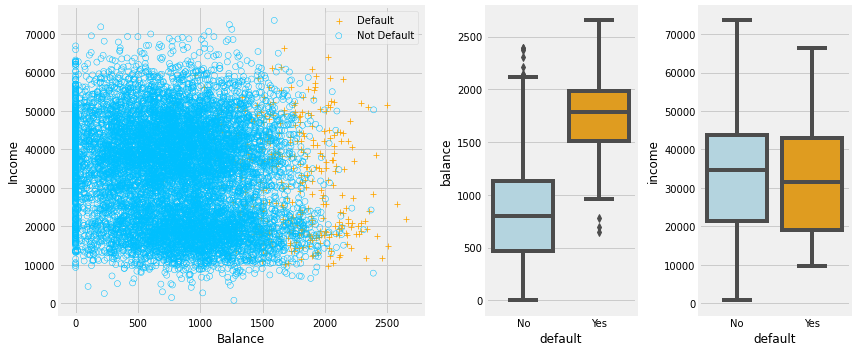

In [6]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
ax1 = plt.subplot(gs[0,:2])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[0,3])

# Scatterplot
ax1.scatter(x=default.balance,y=default.income,marker='+',linewidth=0.8,label='Default',color='orange')
ax1.scatter(x=default_no.balance,y=default_no.income,facecolor='None',edgecolor='deepskyblue',label='Not Default')
ax1.legend(loc='best')
ax1.set_xlabel('Balance')
ax1.set_ylabel('Income')

# Box plot
c_palette = {'No':'lightblue','Yes':'orange'}
sns.boxplot('default','balance',data=credit,orient='v',ax=ax2,palette=c_palette)
sns.boxplot('default','income',data=credit,orient='v',ax=ax3,palette=c_palette)
gs.tight_layout(plt.gcf())

plt.show()

## Can we use Linear Regression?

- Suppose for the Default Classification task that we code,

  $Y = \begin{cases}
  0, &\text{if No}\\
  1, &\text{if Yes}
  \end{cases}$

  We can simply perform a linear regression of $Y$ on $X$ and classify as Yes if $\hat Y > 0.5?$

- In this case of binary outcome, linear regression does a good job as a classfier, and is equivalent to linear discriminant analysis which we will discuss later.
- Since the population $E(Y|X = x) = Pr(Y = 1|X = x)$, we might think that regression is perfect for this task.

In [7]:
credit['default2'] = credit.default.factorize()[0]
credit['student2'] = credit.student.factorize()[0]
credit.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [8]:
X_train = credit.balance.values.reshape(-1,1)
y = credit.default2

In [9]:
X_test = np.arange(credit.balance.min(),credit.balance.max()).reshape(-1,1)

In [10]:
import sklearn.linear_model as sk_lm

In [11]:
clf = sk_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
prob = clf.predict_proba(X_test)

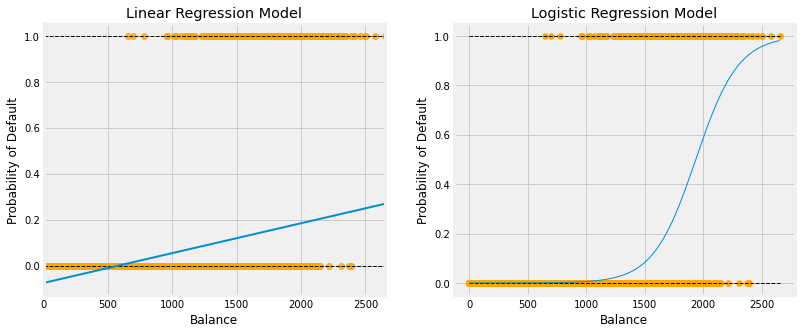

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

# Linear Regression plot
sns.regplot(credit.balance,credit.default2,order=1,ci=None,scatter_kws={'color':'orange'},line_kws={'lw':2},ax=ax1)
ax1.set_title('Linear Regression Model')
ax1.hlines(0,xmin=0,xmax=credit.balance.max(),linestyles='dashed',lw=1)
ax1.hlines(1,xmin=0,xmax=credit.balance.max(),linestyles='dashed',lw=1)
ax1.set_xlabel('Balance')
ax1.set_ylabel('Probability of Default')

# Logistic Regression plot
ax2.set_title('Logistic Regression Model')
ax2.scatter(x=X_train,y=y,c='orange')
ax2.plot(X_test,prob[:,1],lw=1)
ax2.set_xlabel('Balance')
ax2.set_ylabel('Probability of Default')
ax2.hlines(y=0,xmin=X_train.min(),xmax=X_train.max(),linestyles='dashed',lw=1)
ax2.hlines(y=1,xmin=X_train.min(),xmax=X_train.max(),linestyles='dashed',lw=1)

plt.show()

**Observation:**
- From the above plots we can observe from the linear model that when the balance is below 500, the default goes negative. This is not a good indicator.
- Even for the maximum balance the probability of default is less than 0.4.
- However the logistic regression does a much better job compared to linear regression since, logistic regression is not a linear model.
-  The orange mark indicates the respose $Y$, either 0 or 1. Linear Regression doesn't estimate $Pr(Y=1|X)$ properly.
- Logistic Regression is more suited to this type of model.

## Linear Regression Continued

- Now suppose we have a response variable with three possible values. A Patient present at the emergency room, and we must classify them accoriding to their symptomps.

  $\begin{cases}
  1,&\text{if Stroke}\\
  2,&\text{if drug overdose}\\
  3,&\text{if epiliptic seizure}
  \end{cases}$
- This coding suggest an ordering, and infact implies that the difference between stroke and drug overdose is the same as between drug overdose and epiliptic seizure.

# Logistic Regression

- Let's write $p(X) = Pr(Y=1|X)$ for short and considering using balance to predict default. Logistic Regression uses the form

  $p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$

  $(e\approx 2.71828$ is a mathematical constant[Euler's Number]). It is easy to see that no matter what values $\beta_0,\beta_1 \text{or} X$ take, $p(X)$ will have values between 0 and 1. 

- Logistic Regression sample model

  $l(X_1,X_2,X_3) = \frac{e^{\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_3}}{1+e^{\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_3}}$

  and $0<l<1$ where $l = P(X_1,X_2,X_3)$.

- When $l(X_1,X_2,X_3) = \begin{cases}
<0.5 \rightarrow \text{assign to 0}\\
>0.5 \rightarrow \text{assign to 1}
\end{cases}$

- A bit of rearrangement gives,

  $\log(\frac{p(X)}{1-p(X)}) = \beta_0+\beta_1X$.

- This monotone transformation is called the log odd or logit transformation of $p(X)$.
- $\frac{p(X)}{1-p(X)}$ is called odds.
- Logistic Regression ensures that our estimate for $p(X)$ lies between 0 and 1.

## Maximum Likelihood

- We use the maximum likelihood to estimate our parameters.

  $l(\beta_0,\beta_1) = \underset{i:y_i=1}{\Pi}p(x_i)\underset{i:y_i=0}{\Pi}(1-p(X))$.
- This likelihood give the probability of the observed zeros and ones in the data. We pick $\beta_0\text{and}\beta_1$ to maximize the likelihood of the observed data.

## Logistic Regression with a single variable.

In [14]:
import statsmodels.formula.api as smf

In [15]:
model = smf.logit('default2~balance',data=credit).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                  0.4534
Time:                        10:38:03   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0

In [16]:
print(clf.intercept_,clf.coef_)

[-10.65132784] [[0.00549892]]


***Difference between GLM and Logit***
- Logit is a transformation. We use logit to transform our model into a linear model.
- Logistic Regression (GLM)  is a regression model when you have a response variable as a binary variable.
- In Linear Regression, the residuals are assumed to be normally distributed. In Logistic Regression, the residuals need to be independant but not normally distributed.
- Linear Regression assumes constant change in the value of the exogenos variables result in constant change in the value of endogenous variable. This assumption does not hold true if the value of the response variable represents a probability in logistic regression.
- Generalized Linear Model(GLM) does not assume a linear relation between the dependant and the independant variables. However it assumes a linear relationship between the link function and the independant variables in the logit model.

**How to interpret logistic regression coefficients?**

 $l(X_1,X_2) = \frac{e^{\beta_0+\beta_1X_1+\beta_2X_2}}{1+e^{\beta_0+\beta_1X_1+\beta_2X_2}}$

- Lets assume that $\beta_1=1\text{ and }\beta_2 = 0.5$.
- $(e^{\beta_1}-1) \rightarrow (e^1-1) \rightarrow 2.71-1 = 1.71$
- This means that the change in the odds for a unit change in X_1 is 171%.

- From the observation summary. that coef of balance is 0.0055
- $e^{0.0055}-1 = 0.0055$
- A dollar change in the value of balance will result in 0.55 change in the odds of default.


**Making Predictions**

- What is our estimated probability of default for someone with a balance of $1000?

  $\hat p(X) = \frac{e^{\hat\beta_0}+\hat\beta_1X_1}{1+e^{\hat\beta_0}+\hat\beta_1X_1} = \frac{e^{-10.6513+0.0055\times1000}}{1+e^{-10.6513+0.0055\times1000}} = 0.006$

- The odd of default are 0.6%

**With balance of $2000?**


  $\hat p(X) = 0.586$

- The odds of default is 58.6%

***Changing the predictor from Balance to Student***

In [17]:
clf = sk_lm.LogisticRegression(solver='newton-cg')

In [18]:
X_train = credit.student2.values.reshape(-1,1)

In [19]:
clf = clf.fit(X_train,y)

In [20]:
print(f'Intercept:{clf.intercept_}\nCoeff:{clf.coef_}')

Intercept:[-3.50213151]
Coeff:[[0.39959759]]


In [21]:
model = smf.logit('default2~C(student)',data = credit).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                0.004097
Time:                        10:38:04   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.5041      0.071    -49.554      0.000      -3.643      -3.366
C(studen

$e^{0.4049}-1 = 0.499$

- This means that the student has an average of 49.9% chance to default.

$\hat Pr(\text{default}=\text{yes}|\text{student}=\text{yes}) = \frac{e^{-3.5041+0.4049*1}}{1+e^{-3.5041+0.4049*1}} = 0.0431$ 

$\hat Pr(\text{default}=\text{yes}|\text{student}=\text{no}) = \frac{e^{-3.5041+0.4049*0}}{1+e^{-3.5041+0.4049*0}} = 0.0292$ 

## Logistic Regression with several Variables.

In [22]:
X_train = credit[['student2','income','balance']].values.reshape(-1,3)

In [23]:
clf = sk_lm.LogisticRegression(solver='newton-cg').fit(X_train,y)

In [24]:
print(f'Intercept:{clf.intercept_}\n Coefficients:{clf.coef_}')

Intercept:[-10.77081718]
 Coefficients:[[-6.45992211e-01  2.41860658e-06  5.68910702e-03]]


In [25]:
model = smf.logit('default2~balance+income+student',data=credit).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                  0.4619
Time:                        10:38:05   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]  

***Why is the coeffiecient of student negative, when it was positive before?***
- $e^{-0.6768}-1 = -0.47$
- For a constant balance, 47% of student are expected to default less than non-students.


**Observation**
- income is not a significant predictor.

**Confounding**

In [26]:
clf = sk_lm.LogisticRegression(solver='newton-cg')
clf2 = sk_lm.LogisticRegression(solver='newton-cg')

In [27]:
X_train = credit[credit.student2==0]['balance'].values.reshape(len(credit[credit.student2==0]['balance']),1)
X_train_2 = credit[credit.student2==1]['balance'].values.reshape(len(credit[credit.student2==1]['balance']),1)
y_train = credit[credit.student2==0]['default2']
y_train_2 = credit[credit.student2==1]['default2']

In [28]:
clf = clf.fit(X_train,y_train)
clf2 = clf2.fit(X_train_2,y_train_2)

In [29]:
X_test = np.arange(credit.balance.min(),credit.balance.max()).reshape(-1,1)

In [30]:
prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [31]:
credit.groupby(['student','default']).size().unstack('student')

student,No,Yes
default,,
No,6850,2817
Yes,206,127


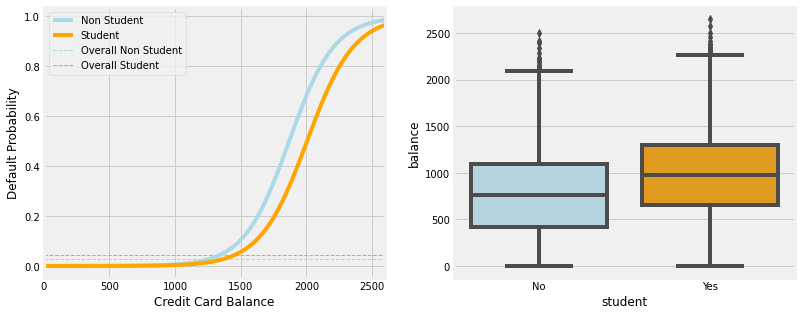

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

# Default Rate of Student vs Non Students
ax1.plot(X_test,pd.DataFrame(prob)[1],color='lightblue',label='Non Student')
ax1.plot(X_test,pd.DataFrame(prob2)[1],color='orange',label='Student')
ax1.hlines(y=206/7056,xmin=0,xmax=X_test.max(),label='Overall Non Student',color='lightblue',linestyles='dashed',lw=1)
ax1.hlines(y=127/2944,label='Overall Student',xmin=0,xmax=X_test.max(),color='orange',linestyles='dashed',lw=1)
ax1.set_xlabel('Credit Card Balance')
ax1.set_ylabel('Default Probability')
ax1.set_xlim(0,2600)
ax1.legend(loc='best')

# Card Balance comapring student vs non students
sns.boxplot('student','balance',data=credit,orient='v',palette=c_palette,ax=ax2)

plt.show()

**Observation:**
- From the above plots, we can observe that the students tend to have higher balances than non-students.
- The default rate of students is lower than that of non students, when the balance is the same.
- For each level of balance, student default less than non students.

## South African Heart Disease

- 160 cases of myocardial infection and 302 controls(all males in the age range 15-64),from Western Cape, South Africa in early 80's.
- Overall prevelance very high in this region: 5.1%
- Measurement on seven predictors(risk factors), shown in scatterplot matrix.
- Goal is to identify relative strength and risk factors.
- This was a part of intervention studies aimed at educating the public on healthier diets.

In [33]:
heart = pd.read_csv('/content/drive/My Drive/Repos/Git/Machine-Learning/An Introduction to Statistical Learning/Dataset/SAheart.data')
heart.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [34]:
heart.drop('row.names',1,inplace=True)

In [35]:
heart.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [36]:
heart['famhist'].replace({'Present':1,'Absent':0},inplace=True)

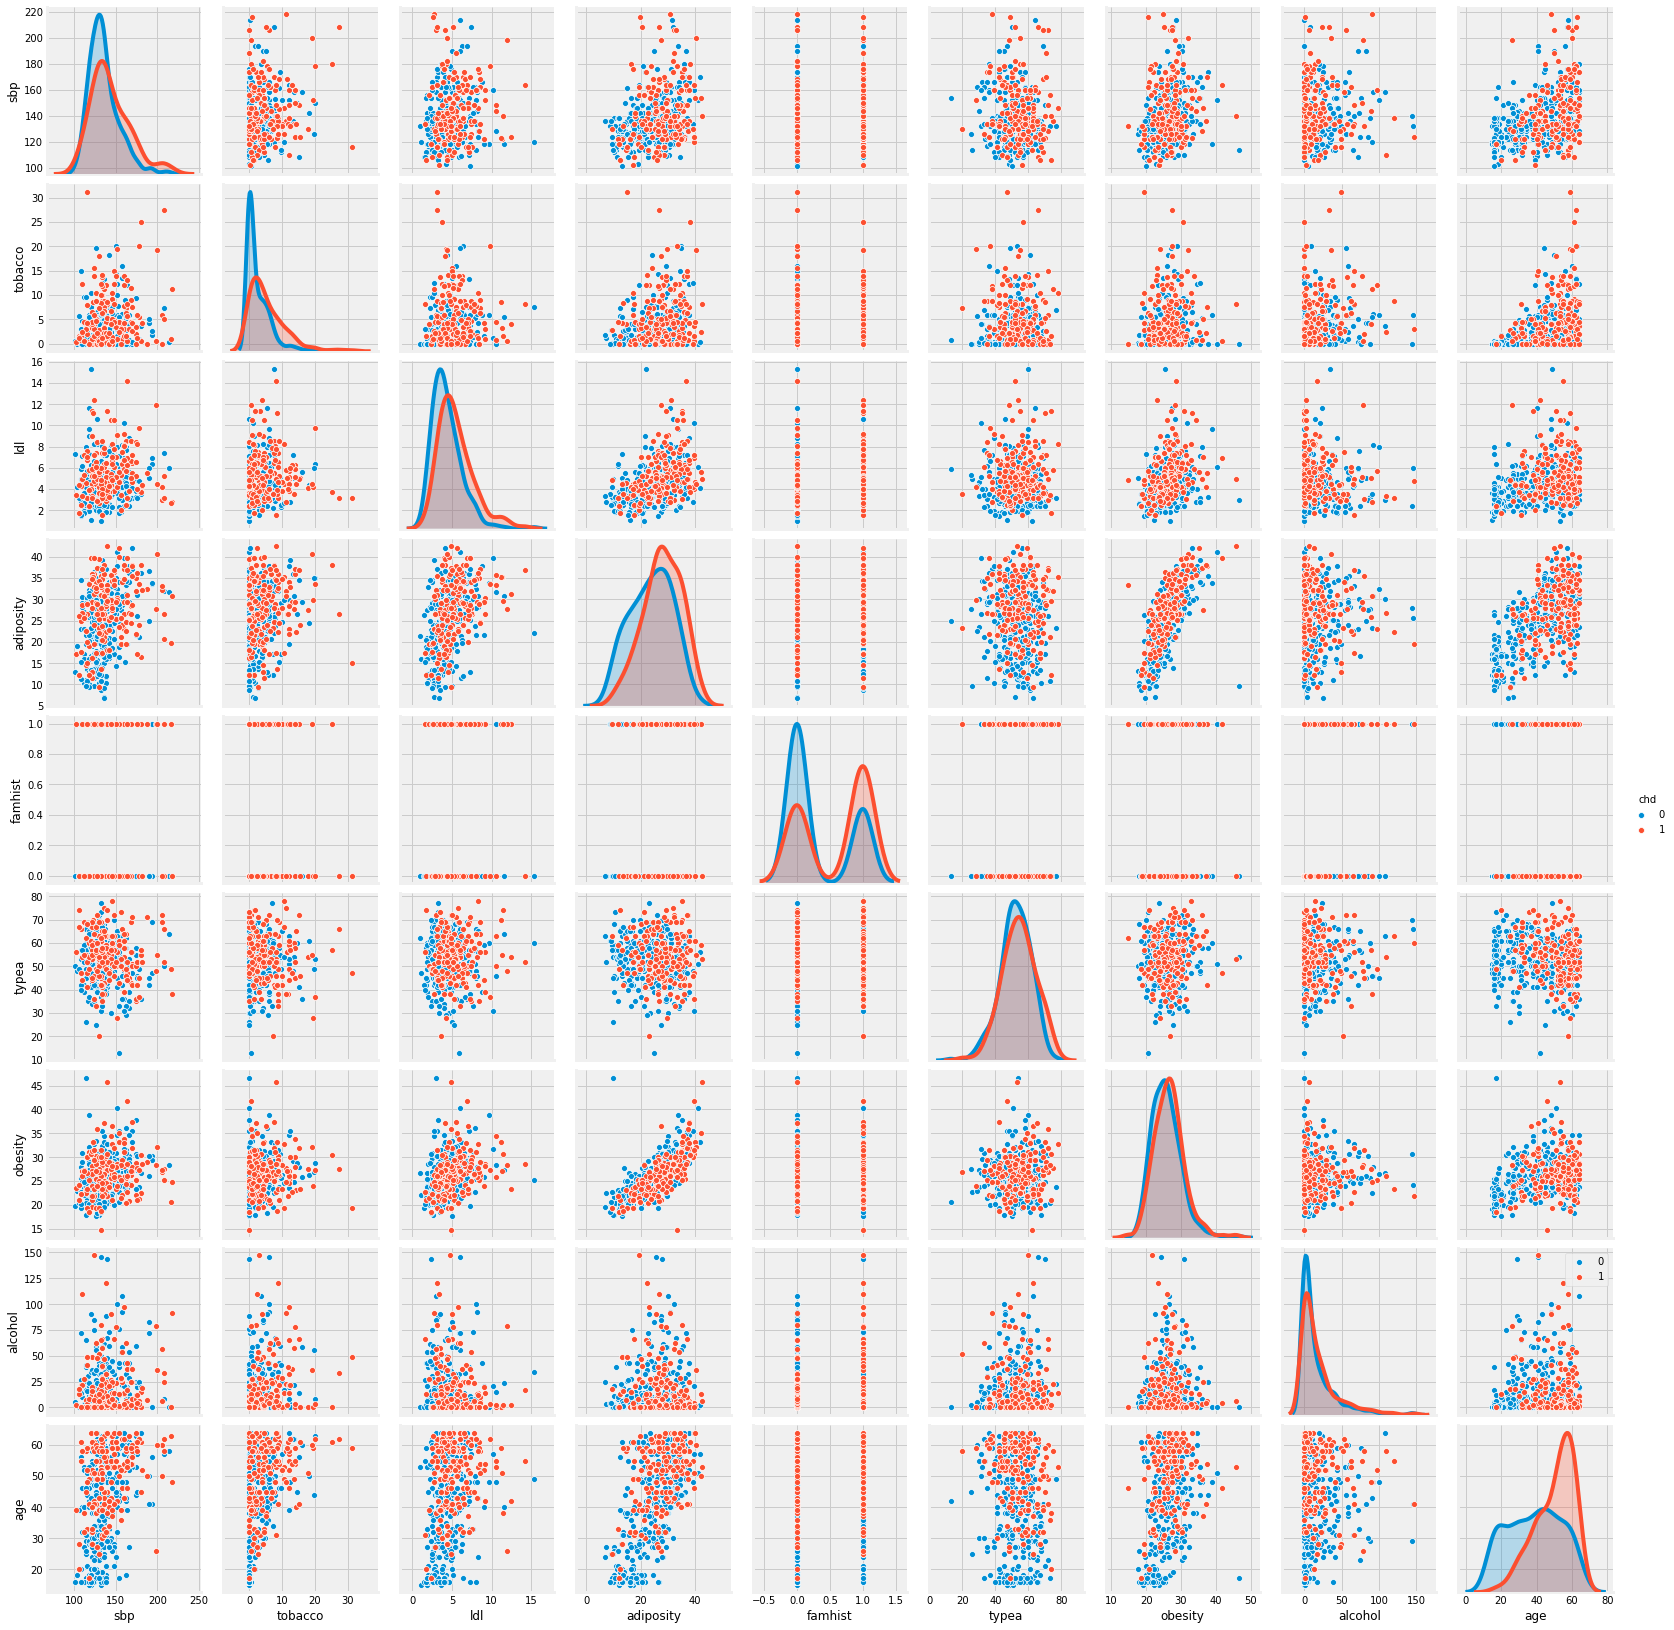

In [37]:
sns.pairplot(heart,hue='chd')
plt.legend(loc='best')
plt.show()

In [38]:
clf = sk_lm.LogisticRegression(solver='newton-cg')

In [39]:
X_train = heart.drop(['chd','typea','adiposity'],1)
y_train = heart['chd']

In [40]:
model = clf.fit(X_train,y_train)

In [41]:
print(f'Intercept:{model.intercept_}')
pd.DataFrame(data=model.coef_.reshape(7,1),index=heart.columns.difference(['adiposity','typea','chd'],sort=False),columns=['Coeffecient'])

Intercept:[-4.11636656]


,Coeffecient
sbp,0.005700
tobacco,0.079061
ldl,0.184673
famhist,0.894129
obesity,-0.034116
alcohol,0.000665
age,0.042716


In [42]:
heart_model = smf.logit('chd~'+'+'.join(heart.columns.difference(['chd'])),data=heart,drop_cols=['adiposity','typea']).fit()
print(heart_model.summary2())

Optimization terminated successfully.
         Current function value: 0.522916
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.189     
Dependent Variable: chd              AIC:              499.1740  
Date:               2020-06-24 10:38 BIC:              532.2586  
No. Observations:   462              Log-Likelihood:   -241.59   
Df Model:           7                LL-Null:          -298.05   
Df Residuals:       454              LLR p-value:      2.2586e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.1296    0.9642  -4.2830  0.0000  -6.0194  -2.2398
age            0.0425    0.0102   4.1808  0.0000   0.0226   0.

**Observation**

- sbp,alcohol and obesity is not significant.
- Lets interpret the family history,

  $e^{0.9392}-1 = 1.557$

  This says that if your family history has a heartattack, then you are at 157% to get a heart attack.
- Coefficient of age is also positive, meaning more age .. more chance of heart attack.
- ldl and tobacco have very high impact on heart attack.
- if you are smoking, then,

  $e^{0.0795}-1 = 0.082$

  there is 8.2% chance that you are likely to get a heart attack.

### Case Control Sampling and Logistic Regression

- In South Africa data, there are 160 cases, 302 controls- $\overset{\sim}{\pi}=0.35$ are cases. Yet the prevalance of MI(Myocardial Infection) in this region is $\pi = 0.05$.
- With case-control samples, we can estimate regression parameters $\beta_j$ accurately; the constant term $\beta_0$ is incorrect.
- We can correct the estimated intercept by a simple transformation.

  $\hat\beta_0^* = \hat\beta_0+\log\frac{\pi}{1-\pi}+\log\frac{\overset{\sim}{\pi}}{1-\overset{\sim}{\pi}}$
- Often cases are rare and we take them all,upto five times that number of controls is sufficient
- We need to replace the intercept value with the new value and further proceed with the model.

### Dimnishing returns in unbalanced binary data

- Sampling more control than cases reduces the variance of the parameter estimates.
- But after a ratio of 5 to 1 the variance reduction flattens out.
- Best Control/Case ratio is anything  at and after 5:1 ratio.

## Logistic Regression with more than two classes

- So far we have been using logistic regression with two classes.
- It is easily generalized to have more than two classes.
- One version has a symmetric form

  $Pr(Y=k|X) = \frac{e^{\beta_{0k}+\beta_{1k}X_1+...+\beta_{pk}X_p}}{\sum_{l=1}^Ke^{\beta_{0k}+\beta_{1k}X_1+...+\beta_{pk}X_p}}$

- Here there is a linear function for each class.
- Multiclass regression is also known as multinomial regression.

# Discriminant Analysis

- Here the approach is to model the distribution of X in each  of the classes seperatly, then use the bayes theorem to flip things around and obtain $Pr(Y|X)$.
- When we use normal(Gaussian) distributions for each class,this leads to linear or quadratic discriminant analysis.
- However this approach is quite general, and other distributions can be used as well. We will focus on the normal distributions.

## Bayes Theorem for Classification 

$Pr(Y=k|X=x) = \frac{Pr(X=x|Y=k).Pr(Y=k)}{Pr(X=x)}$

- We can write this differently in discriminant analysis.

  $Pr(Y = k|X = x) = \frac{\pi_kf_k(x)}{\sum_{l=1}^{K}\pi_lf_l(x)}$, where

  - $f_k(x) = Pr(X = x|Y = k)$ is the density for X in class k. Here, we will use normal densities for these seperatly in each class.
  - $\pi_k = Pr(Y=k)$is the marginal or prior probability for class k.

### Examples of Bayes Theorem

- Given,

  $Pr(F) = 60\%$,

  $Pr(M) = 40\%$

  $Pr(ios|F) = 70\%$

  $Pr(n_ios|F) = 30\%$

  $Pr(ios|M) = 50\%$

  $Pr(n_ios|M) = 50\%$

- Lets say we randomly pick a student,what is the probability, that the student is female given the person is using ios?

$\Rightarrow Pr(F|ios) = \frac{Pr(ios|F).Pr(F)}{Pr(ios)}$,
where 

$\Rightarrow Pr(ios) = Pr(ios|F)*Pr(F)+Pr(ios|M)*Pr(M)$

$\Rightarrow Pr(F|ios) = \frac{0.7*0.6}{0.7*0.6+0.5*0.4}$

$\Rightarrow Pr(F|ios) = \frac{42}{62}$

$\Rightarrow Pr(F|ios) = 0.677 \rightarrow 67.7\%$

## Classify to the Highest Density

- We classify  a new point according to which the density is the highest.
- When the priors are diffrent, we take them into account as well, and compare $\pi_kf_k(x)$

## Linear Discriminant Analysis

### Why do we use linear discriminant analysis?

- When the classes are well seperated, the parameter estimates for logistic regression model are surprisingly unstable. Linear Discriminant Analysis doesn't suffer from this problem.
- If n is small and the distribution of predictors X is approximately normal in each classes, the linear discriminant model is again more stable than logistic regression model.
- Linear discriminant analysis is popular when we have more than two response classes, because it also provides low dimensional views of data.

### **Linear Discriminant Analysis when p=1 where p means dimension**

- The Guassian desnity has the form,

<center>  $f_k(x) = \frac{1}{\sqrt{2\pi}\sigma_k}e^{-\frac{1}{2}\left(\frac{x-\mu_k}{\sigma_k}\right)^2}$
</center>

  Here, $\mu_k$ is the mean, and $\sigma^2_k$ is the variance(in the class $k$).
  we will assume that the $\sigma_k=\sigma$ are the same.

- Applying this into the Bayes formula, we get a rather complex expression for $p_k(x) = Pr(Y=k|X=x):$

<center>  $p_k(x) = \frac{\pi_k\frac{1}{\sqrt{2\pi}\sigma_k}e^{-\frac{1}{2}\left(\frac{x-\mu_k}{\sigma_k}\right)^2}}{\sum_{l=1}^k\pi_l\frac{1}{\sqrt{2\pi}\sigma_k}e^{-\frac{1}{2}\left(\frac{x-\mu_k}{\sigma_k}\right)^2}}$</center>

**Example**

Lets assume that Male Height is normally distributed with mean 6ft and standard deviation of 0.5

$M\rightarrow N(6,0.5)$

$F\rightarrow N(5.5,0.5)$

One important part of Linear Discriminant Analysis is that we assume that standard deviation ($\sigma$)is the same in all categories.

Lets assume that,

$\pi_m = 0.7\rightarrow P(M)$,

$\pi_f = 0.3\rightarrow P(F)$,

 we know that somebody's height is 5ft. What is the probability that the person is female or male?

$P_f(X=5ft) = \frac {\pi_f\times L_f(x=5ft,\mu = 5.5, \sigma = 0.5)}{(\pi_f\times L_f(x=5ft,\mu = 5.5,\sigma = 0.5))+(\pi_m\times L_m(x=5ft,\mu = 6,\sigma = 0.5))}$

$P_f(X=5ft) = \frac{0.3\times \frac{1}{\sqrt{2\pi}0.5}e^{-\frac{1}{2} \left( \frac{5-5.5}{0.5}\right)^2}}{0.3\times \frac{1}{\sqrt{2\pi}0.5}e^{-\frac{1}{2} \left( \frac{5-5.5}{0.5}\right)^2}+0.7\times\frac{1}{\sqrt{2\pi}0.5}e^{-\frac{1}{2}\left(\frac{5-6}{0.5}\right)^2}}$

$P_f(X=5ft) = \frac{0.3\times e^{-\frac{1}{2}}}{0.3\times e^{-\frac{1}{2}}+0.7\times{e^{-2}}}$

$P_f(X = 5ft) = 0.6567 \rightarrow 65.67\%$

***At what height is the chances of male and female 50-50?***

Inorder to determine the height where the chances of male and female are 50-50, we can write it as,

$\rightarrow \pi_f\times{\frac{1}{\sqrt{2\pi}\sigma_f}e^{-\frac{1}{2}\left(\frac{x-5.5}{0.5}\right)^2}} = \pi_m\times{\frac{1}{\sqrt{2\pi}\sigma_m}e^{-\frac{1}{2}\left(\frac{x-6}{0.5}\right)^2}}$

since $\sigma_f = \sigma_m$

$\rightarrow \pi_f\times e^{-2(x-5.5)^2} = \pi_m\times e^{-2(x-6)^2} $

$\rightarrow \frac{e^{-2(x-5.5)^2}}{e^{-2(x-6)^2}} = \frac {\pi_f}{\pi_m} = \frac{0.7}{0.3}$

Taking natural Log on both sides

we know that,$\log\left(\frac{a}{b}\right) = \log(a) - \log(b)$

$\rightarrow \log\left(\frac{e^{-2(x-5.5)^2}}{e^{-2(x-6)^2}}\right) = \log\left(\frac{0.7}{0.3}\right)$

$\rightarrow \log{(e^{-2(x-5.5)^2})}-\log{(e^{-2(x-6)^2})} = \log(2.33)$

also,$\log_e(e^a) = a$

$\rightarrow -2(x-5.5)^2+2(x-6)^2 = 0.8458$

$\rightarrow -2(x^2-11x+30.25)+2(x^2+36-12x) = 0.8458$

$\rightarrow -2x^2+22x-60.5+2x^2+72-24x = 0.8457$

$\rightarrow -2x+11.5 = 0.8457$

$\rightarrow x = 5.327ft $

### **Discriminant Functions**

To classify at the value $X=x$, we need to see which of the $p_k(x)$ is the largest. Taking $\log$, and discarding terms that do not depend on k, we see that this is equivalent to assigning $x$ to the class with largest ***discriminant score***:

<center>$\delta_k(x) = x.\frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log(\pi_k)$
</center>

**Note:**$\delta_k(x)$ is a linear function. 

If there are $K=2$ classes and $\pi_1 = \pi_2 = 0.5$, then once can see that the ***decision boundry*** is at,

<center>$x = \frac{\mu_1+\mu_2}{2}$</center>

Lets apply this to the above example,

$\rightarrow \delta_f(5) = x.\frac{\mu_f}{\sigma^2}-\frac{\mu_f^2}{2\sigma^2}+\log(\pi_f)$

$\mu_f = 5.5$

$\sigma = 0.5$

$\pi_f = 0.3$

Applying these values to the above equation

$\rightarrow \delta_f(5) = 5\times\frac{5.5}{0.5^2}-\frac{5.5^2}{2\times0.5^2}+log(0.3)$

$\rightarrow \delta_f(5) = 110-60.5-1.2$

$\rightarrow \delta_f(5) = 48.3$

$\rightarrow \delta_m(5) =47.6$

### **Estimating the parameters**

**Note**: Our Main assumption is that the standard deviation between the classes are the same.
<center>$\hat\pi = \frac{n_k}{n}$</center><br>
<center>$\hat\mu_k = \frac{1}{n_k}\underset{i:y_i=k}\sum x_i$</center><br>
<center>$\hat\sigma^2 = \frac{1}{n-K}\overset{K}{\underset{k=1}{\sum}}\underset{y_i=k}{\sum}(x_i - \hat\mu_k)^2$</center>
<center>$= \overset{K}{\underset{k=1}{\sum}}\frac{n_k-1}{n-K}\hat\sigma_k^2$</center>

where $\hat\sigma_k^2 = \frac{1}{n_k-1}\sum_{i:yi=k}(x_i -\hat\mu_k)^2$ is the usual formula for estimated variance in the $k^{th}$ class.

Here $n_k$ denotes the no of observations in the category $k$ and $n$ is the total number of observations.

***Example***

Lets take a sample data,

|S.no|Gender|
|:---|:---|
|1|Male|
|2|Female|
|3|Male|
|4|Female|
|5|Female|

***Estimating parameters for the sample data.***

$\hat\pi_m = \frac{2}{5} = 0.4$<br>
$\hat\pi_f = \frac{3}{5} = 0.6$

Lets assume that the variance of the data,

$\hat\sigma^2_f = 0.5$<br>
$\hat\sigma_m^2 = 1$<br>

$\hat\sigma^2 = \frac{n_m-1}{n-K}\hat\sigma_m^2+\frac{n_f-1}{n-K}\hat\sigma_f^2$<br>
$\hat\sigma^2 = \frac{2-1}{5-2}\times1^2+\frac{3-1}{5-2}\times0.5^2$<br>
$\hat\sigma^2 = 0.496$

This is the standard deviation that can be used for both the classes.

### **Linear Discriminant Analysis when p>1 where p means dimensions**

<center>Density:$f(x)=\frac{1}{(2\pi)^{p/2}\left|\Sigma\right|^{1/2}}e^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}$</center>

Here $\Sigma$ means **variance-covariance matrix**.

for example,

$\begin{equation*}
\Sigma = 
\begin{pmatrix}
x1_{00}&x1_{01}\\
x2_{10}&x2_{11}
\end{pmatrix}
\end{equation*}$

Here the diagonal values are variance and the rest are co-variance values

Discriminant Function:$\delta_k(x) = x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+\log\pi_k$ 

Despite its complex form,

$\delta_k(x) = c_{k0}+c_{k1}x_1+c_{k2}x2+...+c_{kp}x_p$ is a linear function

The **Bayes decision boundaries** would yield the fewest misclassification errors, among all possible classifiers.

### **From $\hat\delta_k(x)$(Discriminant Score) to Probabilities**

Once we have the estimates $\hat\delta_k(x)$, we can turn these into estimates for class probabilities:

<center>$\hat{Pr}(Y = k|X = x) = \frac{e^{\hat\delta_k(x)}}{\sum_{l=1}^Ke^{\hat\delta_l(x)}}$</center>

So the classifying to the largest $\hat\delta_k(x)$ amounts to the classifying to the class for which the probability is the largest.

When K=2, we classify to class 2 if the probability is greater than 0.5, else to class 1.


### **LDA on Default Dataset**

In [43]:
default_data = pd.read_excel('/content/drive/My Drive/Repos/Git/Machine-Learning/An Introduction to Statistical Learning/Dataset/Default.xlsx')

In [44]:
default_data.head(3)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947


In [45]:
default_data.drop(['Unnamed: 0'],1,inplace=True)
default_data.head(3)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947


In [46]:
default_data['default'] = default_data.default.factorize()[0]
default_data['student'] = default_data.student.factorize()[0]
default_data.head(3)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947


In [47]:
lda =  LinearDiscriminantAnalysis(solver='svd') # initiating Linear Discriminant Analysis

In [48]:
X = default_data.drop('default',1).values
y = default_data.default.values.reshape(-1)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [51]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [52]:
y_pred = lda.predict(X_test)

In [53]:
df = pd.DataFrame({'True Default Status':y_test,'Predicted Default Status':y_pred})
df.replace(to_replace={0:'No',1:'Yes'},inplace=True)
df.groupby(['True Default Status','Predicted Default Status']).size().unstack('True Default Status')

True Default Status,No,Yes
Predicted Default Status,,
No,1939,38
Yes,2,21


- Here the misclassification rate is,

$(38+2)/2000$ errors - $2\%$misclassification rate.

Some caveats,
- This is training error, we might be overfitting the data.
- If we classified to the prior -  always to class No in this case, - we would make 59/2000 errors or only $2.95\%$ errors
- Of the true No's, we make $2/1941 = 0.1\%$ errors; Of the true Yes's, we would make, $38/59 = 64.4\%$ errors!

#### **Types of Errors**

- **False Positive Errors:** The fraction of negative examples that are  classified as positive - $0.1\%$ in the example.
- **False Negative Errors:** The fraction of positive examples that are classified as negative - $64.4\%$ in the example.

We produced this table by classifying to class `Yes` if ,

$\hat{Pr}(Default=Yes|Student,Balance,Income)\ge 0.5$

We can change the two error rates by changing the threshold from 0.5 to some other value in between 0 and 1.

$\hat{Pr}(Default=Yes|Student,Income,Balance)\ge threshold$

and vary the threshold.

In [54]:
y_prob = lda.predict_proba(X_test)

In [55]:
df_ = pd.DataFrame({'True Default Status':y_test,'Predicted Default Status':y_prob[:,1]>0.1})
df.groupby(['True Default Status','Predicted Default Status']).size().unstack('True Default Status')


True Default Status,No,Yes
Predicted Default Status,,
No,1939,38
Yes,2,21


In [56]:
errors = {}
for i in np.arange(0.02,0.5,0.01):
  decision_prob = i
  df_ = pd.DataFrame({'True Default Status':y_test,'Predicted Default Status':y_prob[:,1]>decision_prob})
  df_.replace(to_replace={0:'No',1:'Yes','False':'No','True':'Yes'},inplace=True)
  x = df_.groupby(['True Default Status','Predicted Default Status']).size().unstack('True Default Status')
  errors[i]={}
  errors[i]['Misclassification Error'] = ((x.iloc[0,1]+x.iloc[1,0])/(x.iloc[0,:].sum()+x.iloc[1,:].sum()))
  errors[i]['False Positive Error'] = (x.iloc[1,0]/x.iloc[:,0].sum())
  errors[i]['False Negative Error'] = (x.iloc[0,1]/x.iloc[:,1].sum())
  errors[i]['True Positive Rate'] = ((x.iloc[1,1])/(x.iloc[1,1]+x.iloc[0,1]))
  errors[i]['False Positive Rate'] = ((x.iloc[1,0])/(x.iloc[:,0].sum()))


In [57]:
err_df = pd.DataFrame(errors)

In [58]:
err_df = err_df.swapaxes('index','columns')

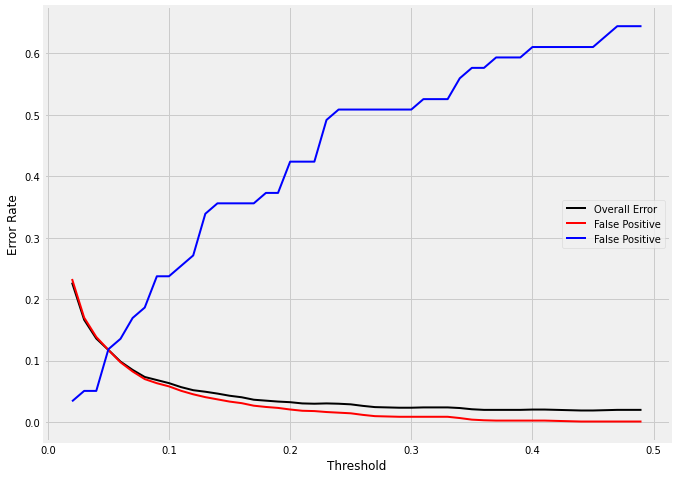

In [59]:
plt.figure(figsize=(10,8))
plt.plot(err_df.index,err_df['Misclassification Error'],label='Overall Error',color='black',lw=2)
plt.plot(err_df.index,err_df['False Positive Error'],label='False Positive',color='red',lw=2)
plt.plot(err_df.index,err_df['False Negative Error'],label='False Positive',color='blue',lw=2)
plt.legend(loc='center right')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.show()

**ROC Curve**

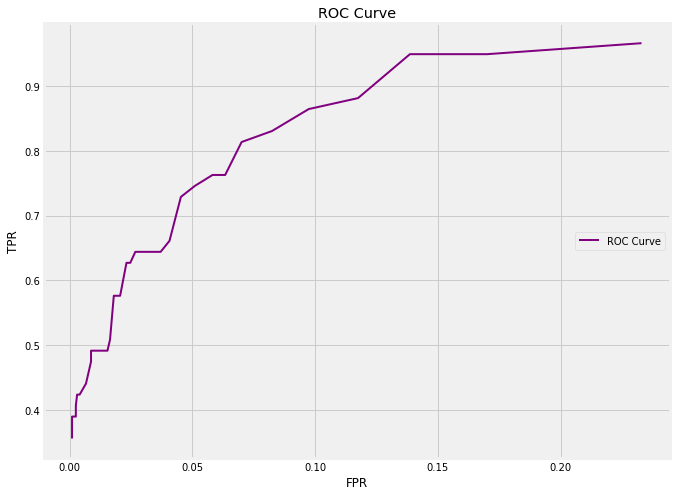

In [60]:
plt.figure(figsize=(10,8))
plt.title('ROC Curve')
plt.plot(err_df['False Positive Rate'],err_df['True Positive Rate'],label='ROC Curve',color='purple',linewidth=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='center right')
plt.show()

### **Confusion Matrix**

**Understanding Confusion Matrix**

Confusion Matrix is a performace measurement for machine learning classification.

- ***What is a confusion matrix and why do we need it?***
- ***How to calculate the Confusion Matrix for 2-Class Classfication problems?***



#### **What is a Confusion Matrix and why do we need it?**

It is a performance measure for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

![alt text](https://drive.google.com/uc?export=view&id=1upxFI0QHIoyLPzfIoIiNSogHacKG8s-J)

It is extremly useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.




#### **How to Calculate the Confusion Matrix for 2-Class Classification Problem?**

Lets understand the confusion matrix through math.

![alt text](https://drive.google.com/uc?export=view&id=117ocNGtncKGglbj6OYGZ-LY1d2jCwSIv)

**Recall**
Out of all postive cases, how much we predicted correctly. It should be high as possible.

**Precision**
Out of all the predicted postive cases, how much are actually positive.

**Accuracy**
Out of all the data, how much did we predict correctly.


#### **F-measure**

$\text{F-measure} = \frac {2\times\text{Recall}\times\text{Precision}}{\text{Recall}+\text{Precision}}$

It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. It helps to measure Precision and Recall at the same time. It uses Harmonic Mean instead of Arthmatic Mean by punishing the extreme values even more.

For two given quantities, 20 and 30, the Arithmatic mean is $\frac{(20+30)}{2}$ and Harmonic Mean is $\frac{2}{\frac{1}{20}+\frac{1}{30}}$. Arithmatic mean is always the larger of the two at any point of time.

It can be shown that always A$\ge$H with equality only when all numbers are equal.

### **ROC Curve**

**Understanding AUC-ROC Curve**

In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, we can count on an AUC-ROC Curve. When we need to check or visualize the performance of a multi-class classification problem, we use AUC(Area under curve) ROC(Reciever Operator Characteristics) curve. It is one of the most important evaluvation metrics for checking any classification model's performance. It is also denoted as AUROC(Area Under Recieving Operating Characteristics)

- ***What is AUC-ROC Curve?***
- ***Defining terms using in AUC and ROC Curve***
- ***How to speculate the performace of the model***
- ***Relation between Sensitivity, Specificity, FPR and Threshold***
- ***How to use AUC-ROC curve for multiclass model?***

#### **What is AUC-ROC Curve?**

AUC-ROC curve is a performance measurement for classification problem at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of seperability. <mark>It tells how much the model is capable of distinguising  between classes</mark>. Higher, the AUC the better the model is at predicting. 

The ROC is plotted with True Positive Rate against False Positive Rate where TPR is on y-axis and FPR is on x-axis.

![alt text](https://drive.google.com/uc?export=view&id=19-FPmKHNz0N7frJ9NFuDqJYv_2t1DScH)


#### **Defining terms Used in the AUC-ROC Curve**

- **TPR(True Positive Rate)/Recall/Sensitivity$=\frac{\text{TP}}{\text{TP}+\text{FN}}$**

- **Specificity$=\frac{\text{TN}}{\text{TN}+\text{FP}}$**
- **FPR$=1-\text{specificity} = \frac{\text{FP}}{\text{FP}+\text{TN}}$**

#### **How to Speculate the performance of the model?**

- An excellent model has AUC near to 1, which means it has a good measure of seperability.
- A poor model has AUC near to 0, which means it has no good measure of seperability.

#### **Relationship between Sensitivity, Specificity, FPR and Threshold**

- Sensitivity and Specificity are inversly proportional to each other. So when we increase the Sensitivity, Specificity decreases and vice versa.

- When we decrease the threshold, we get more positive values thus it increases sensitivity and decreasing specificity.

- Similarly, when we increase the threshold, we get more negative values this it increases specificity and decreases sensitivity.


#### **How to AUC-ROC Curve for multi-class Model?**

In multi-class model, we can plot N Numbers of AUC-ROC curves for N number of classes using One vs all. For example, if we have three classes, named X, Y and Z, we will have one ROC for X against Y and Z, another ROC for Y against Z and X and one ROC for Z against X and Y.

### **Other Forms of Discriminant Analysis**

$\text{Pr}(Y = k|X =x) = \frac{\pi_kf_k(x)}{\sum_{l=1}^K\pi_lf_1(x)}$

When $f_k(x)$ are Guassian densities, with the same covariance matrix $\Sigma$ in each class, this leads to linear discriminant analysis. By altering the forms of $f_k(x)$, we get different classifiers.

- With Gaussians but different $\Sigma_k$ in each class, we get *quadratic discriminant analysis*.
- With $f_k(x)=\Pi^{p}_{j=1}f_{jk}(x_j)$ (Conditional Independance Model) and in each class we get *naive Bayes*. For Gaussian, this means $\Sigma_k$ is diagonal.
- Many other forms, by proposing specific density models for $f_k(x)$, including non-parametric approaches.

***Example***

- Lets consider a large number of features for our sample data.
- Considering a Variance-Covariance Matrix ($\Sigma$), since the variance are the diagonals, the covariance values are the rest of the diagonal, even for 10 features, the number covariance values will be high as 55 variables.
- If the number of features is high we assume the *naive Bayes* model and take the diagonal as the covariance.

### **Quadratic Discriminant Analysis**

$\delta_k(x) = -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)+\log{\pi_k}$

Because the $\Sigma_k$ are different, the quadratic terms matter.


### **Naive Bayes**

Assuming the features are independant in each class. Its useful when *p*(no.of features) is large, and so multivariate methods like QDA(quadratic discriminant analysis) and even LDA (linear discriminant analysis) breakdown.

- Gaussian naive Bayes assumes that each $\Sigma_k$ is diagonal:

$\delta_k(x) = -\frac{1}{2}\overset{p}{\underset{j=1}{\sum}\frac{(x_j-\mu_{kj})^2}{\sigma^2_{kj}}+\log(\pi_k)}$

where $k$ is the class and $j$ is the feature.

- Can use for *mixed* feature vectors(qualitative and quantitative). If $X_j$ is a qualitative, replace $f_{kj}(x_j)$ with probability mass function (histogram) over discrete categories.


**Note:**

Logistic Function vs LDA

For a two-class problem, one can show that for LDA,

$\log\left(\frac{p_1(x)}{1-p_1(x)}\right) = \log\left(\frac{p_1(x)}{p_2(x)}\right) = c_0+c_1x_1+...+c_px_p$

so it has the same form as logistic regression.

The difference is in how the parameters are estimated.

- Logistic regression uses the conditional likelihood based on $Pr(Y|X)$(known as *discriminative learning*)
- LDA uses full likelihood based on $Pr(X,Y)$(known as *generative learning*).
- Despite these differences, the results are often very similar.

***FootNote:*** Logistic regression can also fit quadratic boundaries like QDA, by explicitly including quadratic terms in the model.


***Summary:***
- Logistic Regression is very popular for classification, especially when $K=2$.(where $K$ is the number of Classes).
- LDA is useful when *n* is small, or the classes are well seperated, and Guassian assumptions are reasonable. Also when $K>2$.
- Naive Bayes is useful when *p* is large.(p is the number of features).

